In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')

### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties like correlation of the dataset.

In [3]:
# Code starts here

train_data = pd.read_csv('../data/train.csv')
train_data.head(5)
# Code ends here.

,Id,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
0,124,3,2,995000,1,135,6.3,3143,2,2,0,100.0,1998,26,145.01600,5,4836
1,5905,2,0,1080000,1,155,2.0,3066,1,0,0,94.0,1890,31,144.98863,2,4553
2,5963,3,0,725000,1,196,17.9,3082,2,2,602,129.0,1980,29,145.06912,2,10529
3,3521,4,0,1330000,1,251,8.0,3016,3,2,217,266.0,2003,10,144.87960,6,6380
4,3738,3,0,620000,1,221,12.4,3060,1,2,604,190.0,1970,23,144.96860,2,5070


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4781 entries, 0 to 4780
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             4781 non-null   int64  
 1   Rooms          4781 non-null   int64  
 2   Type           4781 non-null   int64  
 3   Price          4781 non-null   int64  
 4   Method         4781 non-null   int64  
 5   SellerG        4781 non-null   int64  
 6   Distance       4781 non-null   float64
 7   Postcode       4781 non-null   int64  
 8   Bathroom       4781 non-null   int64  
 9   Car            4781 non-null   int64  
 10  Landsize       4781 non-null   int64  
 11  BuildingArea   4781 non-null   float64
 12  YearBuilt      4781 non-null   int64  
 13  CouncilArea    4781 non-null   int64  
 14  Longtitude     4781 non-null   float64
 15  Regionname     4781 non-null   int64  
 16  Propertycount  4781 non-null   int64  
dtypes: float64(3), int64(14)
memory usage: 635.1 KB


In [5]:
train_data.describe()

,Id,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
count,4781.000000,4781.000000,4781.000000,4.781000e+03,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000
mean,3432.481908,2.964861,0.540473,1.080936e+06,1.441330,131.485254,10.045367,3103.308931,1.587952,1.605522,480.500105,143.157231,1964.338423,13.609705,144.991934,3.772223,7477.201213
std,1953.488159,0.957911,0.837337,6.757098e+05,1.141898,77.203630,5.871496,87.538064,0.711276,0.946698,899.489722,91.438501,38.064151,10.389644,0.103051,2.024068,4395.746550
min,0.000000,1.000000,0.000000,1.450000e+05,0.000000,2.000000,0.000000,3000.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-1.000000,144.545320,0.000000,389.000000
25%,1757.000000,2.000000,0.000000,6.300000e+05,1.000000,73.000000,6.100000,3044.000000,1.000000,1.000000,168.000000,94.000000,1940.000000,2.000000,144.927270,2.000000,4380.000000
50%,3434.000000,3.000000,0.000000,9.000000e+05,1.000000,135.000000,9.200000,3083.000000,1.000000,2.000000,411.000000,126.000000,1970.000000,15.000000,144.997500,5.000000,6567.000000
75%,5126.000000,4.000000,1.000000,1.337000e+06,1.000000,194.000000,13.000000,3147.000000,2.000000,2.000000,638.000000,172.000000,2000.000000,23.000000,145.055720,5.000000,10331.000000
max,6829.000000,8.000000,2.000000,9.000000e+06,4.000000,267.000000,47.300000,3977.000000,8.000000,10.000000,37000.000000,3112.000000,2018.000000,32.000000,145.445300,7.000000,21650.000000


                     Id     Rooms      Type     Price    Method   SellerG  \
Id             1.000000  0.075467 -0.082662 -0.096217  0.015201  0.034281   
Rooms          0.075467  1.000000 -0.590817  0.523579 -0.053525 -0.029506   
Type          -0.082662 -0.590817  1.000000 -0.426876  0.088308  0.026955   
Price         -0.096217  0.523579 -0.426876  1.000000 -0.048165 -0.065393   
Method         0.015201 -0.053525  0.088308 -0.048165  1.000000 -0.008889   
SellerG        0.034281 -0.029506  0.026955 -0.065393 -0.008889  1.000000   
Distance       0.297354  0.289699 -0.242188 -0.158197 -0.064479  0.024476   
Postcode       0.075244  0.050753  0.018737  0.120166 -0.034679 -0.001913   
Bathroom       0.002907  0.607276 -0.276890  0.493173 -0.013801 -0.034939   
Car            0.088199  0.420030 -0.278868  0.237160 -0.019285 -0.000271   
Landsize       0.075567  0.092030 -0.043433  0.072753 -0.021601 -0.028470   
BuildingArea  -0.017175  0.595395 -0.386768  0.519207 -0.048287 -0.042596   

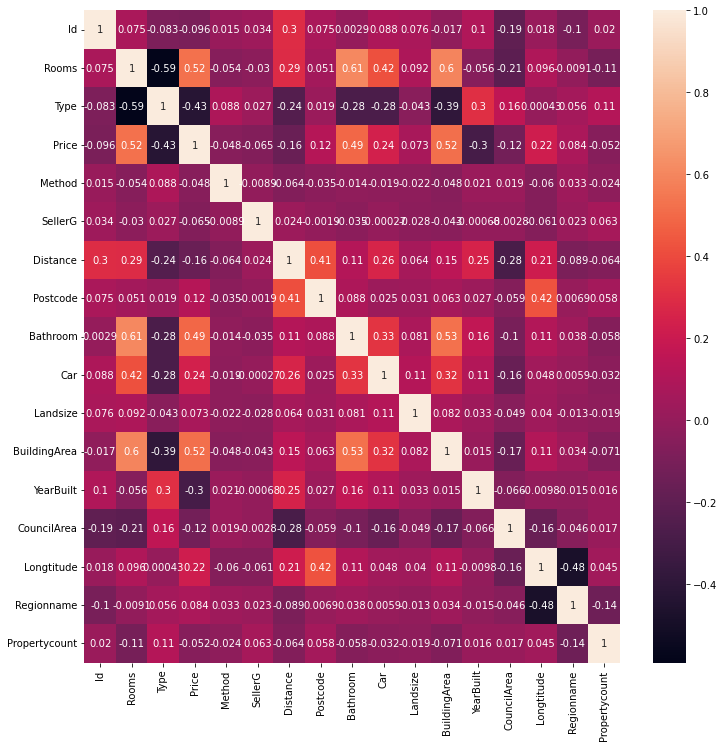

In [7]:
corr = train_data.corr()
print(corr)
plt.figure(figsize = (12,12)) 
sns.heatmap(corr, annot = True)
plt.show()

## Model building

- Separate the features and target and then split the train data into train and validation set.
- Apply different models of your choice and  then predict on the validation data and find the `accuracy_score` for this prediction.
- Try improving upon the `accuracy_score` using different regularization techniques.

In [8]:
# Code starts here

X = train_data.drop(columns = ['Price'],  axis =1)
y = train_data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 6)

# Code ends here.

In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test,y_pred_lr)
print(r2_lr)
print('='*70)

lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred_las = lasso.predict(X_test)
r2_las = r2_score(y_test,y_pred_las)
print(r2_las)
print('='*70)

ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
r2_ridge = r2_score(y_test,y_pred_ridge)
print(r2_ridge)
print('='*70)

cv_score = np.mean(cross_val_score(lr,X_train,y_train,cv = 10))
print(cv_score)
print('='*70)

poly_model = make_pipeline(PolynomialFeatures(2),lr)
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)
r2_poly = r2_score(y_test,y_pred_poly)
print(r2_poly)
print('='*70)

poly_model1 = make_pipeline(PolynomialFeatures(3),lr)
poly_model1.fit(X_train, y_train)
y_pred_poly1 = poly_model1.predict(X_test)
r2_poly1 = r2_score(y_test,y_pred_poly1)
print(r2_poly1)
print('='*70)

0.5270656389349329
0.5270624833347869
0.5262203747327259
0.6371679622911456
0.13090769696821014
-404.1022576423015


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [11]:
# Code starts here
test_data = pd.read_csv('../data/test.csv')

poly_model.fit(X_train, y_train)
y_pred = poly_model.predict(test_data)
y_pred



# data_sub = pd.read_csv('sample_submission.csv')
# data_sub['Price'] = y_pred
# csv_data = data_sub.to_csv('submission.csv', index = False)


# Code ends here.

array([ 779284.1782074 ,  787634.75015259, 1923547.39890289, ...,
        951811.46146393, 2386925.97012329, 1645165.04514313])